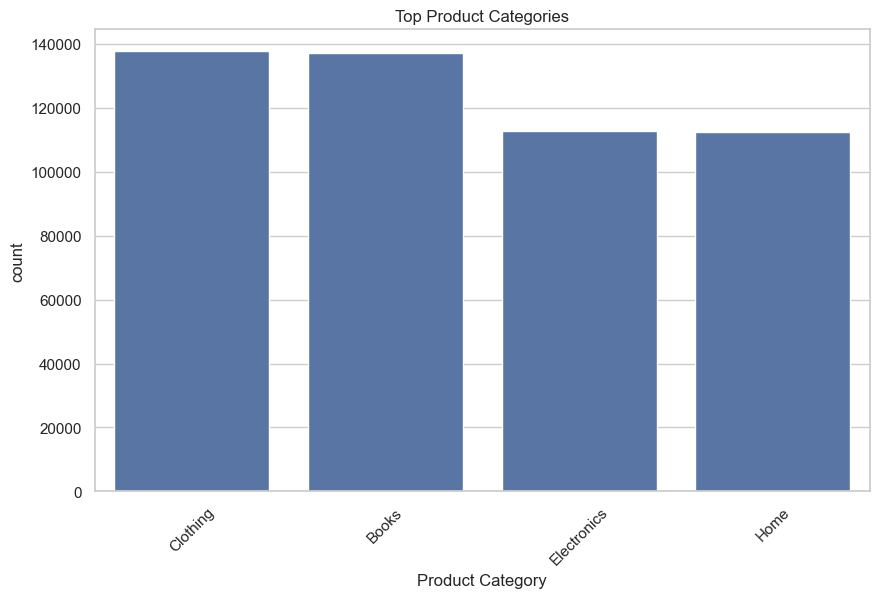

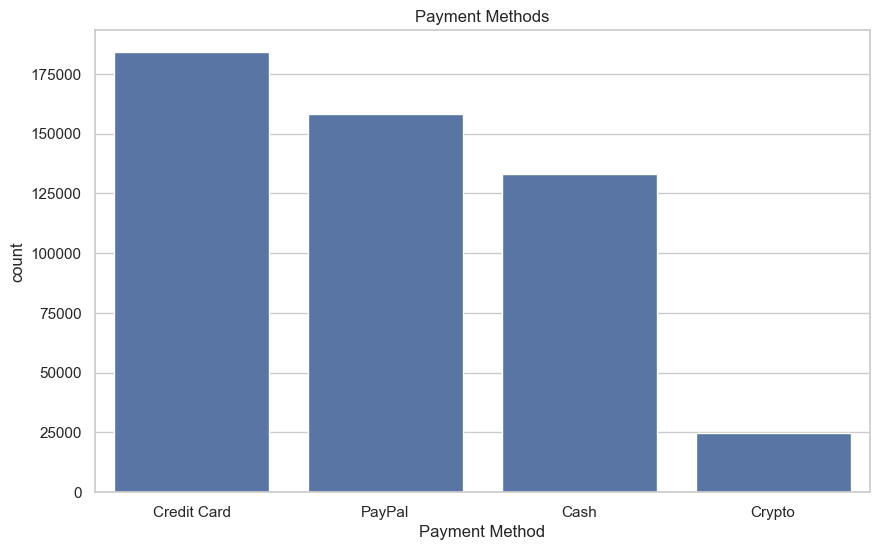

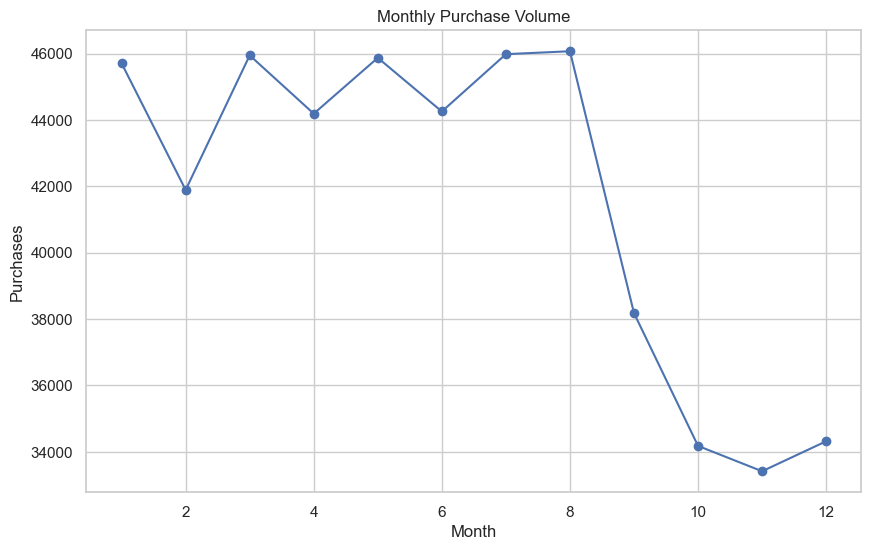

C:\Users\dell\AppData\Local\Temp\ipykernel_17248\422579913.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_spend = df.groupby('Age Group')['Total Purchase Amount'].mean().reset_index()
C:\Users\dell\AppData\Local\Temp\ipykernel_17248\422579913.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age Group', y='Total Purchase Amount', data=age_spend, palette='coolwarm')


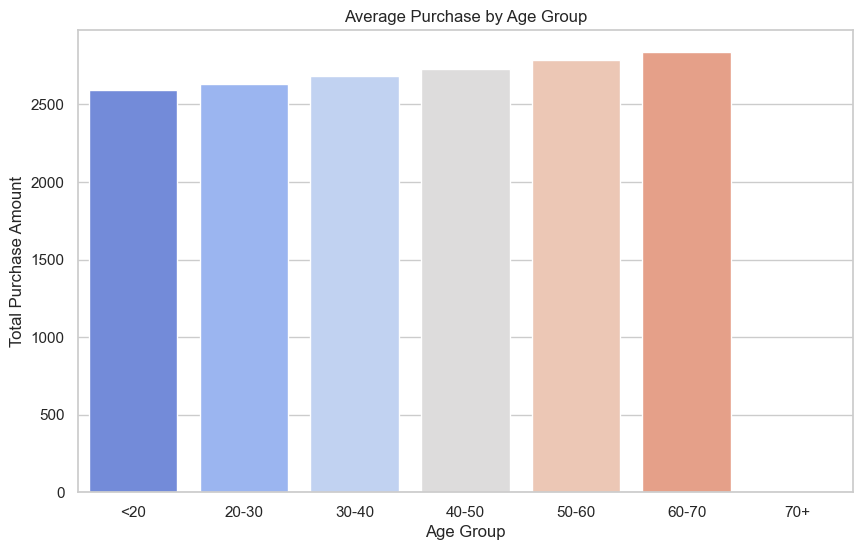

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Upload CSV files

df1 = pd.read_csv("ecommerce_customer_data_large.csv")
df2 = pd.read_csv("ecommerce_customer_data_custom_ratios.csv")

df = pd.concat([df1, df2], ignore_index=True)
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], errors='coerce')
df['Returns'] = df['Returns'].fillna(0)
df.drop(columns=["Customer Age"], inplace=True)
df['Month'] = df['Purchase Date'].dt.month
df['DayOfWeek'] = df['Purchase Date'].dt.day_name()
df['Age Group'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 60, 70, 100],
                         labels=['<20', '20-30', '30-40', '40-50', '50-60', '60-70', '70+'])
# Product Category Count
sns.countplot(data=df, x="Product Category", order=df['Product Category'].value_counts().index)
plt.title("Top Product Categories")
plt.xticks(rotation=45)
plt.show()

# Payment Method
sns.countplot(data=df, x="Payment Method", order=df['Payment Method'].value_counts().index)
plt.title("Payment Methods")
plt.show()

# Monthly Purchases
df['Month'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title("Monthly Purchase Volume")
plt.xlabel("Month")
plt.ylabel("Purchases")
plt.show()

# Age Group vs Avg Spend
age_spend = df.groupby('Age Group')['Total Purchase Amount'].mean().reset_index()
sns.barplot(x='Age Group', y='Total Purchase Amount', data=age_spend, palette='coolwarm')
plt.title("Average Purchase by Age Group")
plt.show()